<a href="https://colab.research.google.com/github/DrStephPowers/MGMT-in-Python/blob/main/PERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERT with Probabilistic Durations and MC simulations

Graph the Precedence Network

In [ ]:
!pip install schemdraw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
import schemdraw
from schemdraw import flow

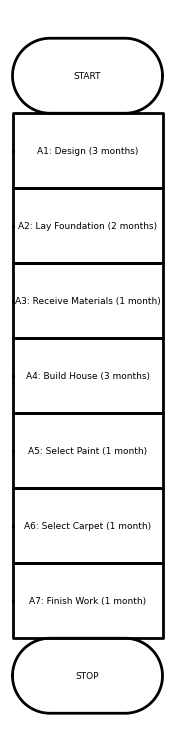

In [ ]:
with schemdraw.Drawing() as d:
  d.config(fontsize=8)
  d += (A0:= flow.Start(w=3, h=1.5, label='START'))
  d += (A1 := flow.Box(w=3, h=1.5, label='A1: Design (3 months)'))
  d += (A2 := flow.Box(w=3, h=1.5, label='A2: Lay Foundation (2 months)'))
  d += (A3 := flow.Box(w=3, h=1.5, label='A3: Receive Materials (1 month)'))
  d += (A4 := flow.Box(w=3, h=1.5, label='A4: Build House (3 months)'))
  d += (A5 := flow.Box(w=3, h=1.5, label='A5: Select Paint (1 month)'))
  d += (A6 := flow.Box(w=3, h=1.5, label ='A6: Select Carpet (1 month)'))
  d += (A7 := flow.Box(w=3, h=1.5, label='A7: Finish Work (1 month)'))
  d += (A8:= flow.Start(w=3, h=1.5, label='STOP'))


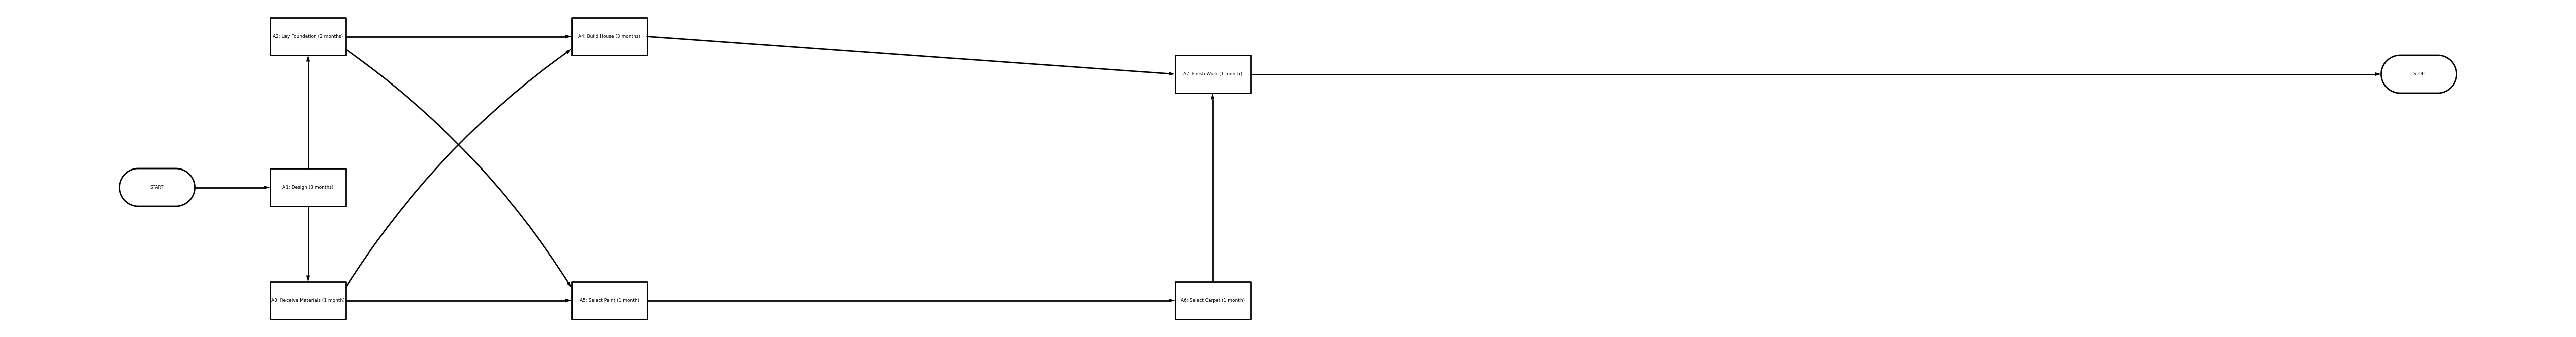

In [ ]:
with schemdraw.Drawing() as d:
  d.config(fontsize=8)
  d += (A0:= flow.Start(w=3, h=1.5, label='START'))
  d += flow.Arrow("right", l=d.unit/3, xy=A0.E, tox=A1.W)

  d += (A1 := flow.Box(w=3, h=1.5, label='A1: Design (3 months)'))
  d += flow.Arrow("up", l=d.unit/3, xy=A1.N, toy=A2.S)

  d += (A2 := flow.Box(w=3, h=1.5, label='A2: Lay Foundation (2 months)'))
  d += flow.Arrow("right", l=d.unit/3, xy=A2.E, tox=A4.W)

  d += (A4 := flow.Box(w=3, h=1.5, label='A4: Build House (3 months)'))
  d += flow.Arrow(l=d.unit/3, xy=A4.E, to=A7.W)

  d += flow.Arrow("down", l=d.unit/3, xy=A1.S, toy=A3.N)

  d += (A3 := flow.Box(w=3, h=1.5, label='A3: Receive Materials (1 month)'))
  d += flow.Arrow("right", l=d.unit/3, xy=A3.E, tox=A5.W)

  d += (A5 := flow.Box(w=3, h=1.5, label='A5: Select Paint (1 month)'))
  d += flow.Arrow("right", l=d.unit/3, xy=A5.E, tox=A6.W)

  d += (A6 := flow.Box(w=3, h=1.5, label ='A6: Select Carpet (1 month)'))
  d += flow.Arrow("up", l=d.unit/3, xy=A6.N, toy=A7.S)

  d += (A7 := flow.Box(w=3, h=1.5, label='A7: Finish Work (1 month)'))
  d += flow.Arrow("right", l=d.unit/3, xy=A7.E, tox=A8.W)
  d += (A8:= flow.Start(w=3, h=1.5, label='STOP', anchor ="W"))

  d += flow.Arc2(k=.1, arrow='->', xy=A3.ENE, to=A4.WSW)
  d += flow.Arc2(k=.1, arrow='->', xy=A2.ESE, to=A5.WNW)


Find Critical Path and Completion Time with No Variability

In [ ]:
import pandas as pd
import numpy as np
from numpy import random

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def crit_path(A1, A2, A3, A4, A5, A6, A7):
    path1 = A1 + A2 + A4 + A7
    path2 = A1 + A3 + A5 + A6 + A7
    path3 = A1 + A2 + A5 + A6 + A7
    path4 = A1 + A3 + A4 + A7
    max_time = max(path1, path2, path3, path4)
    if path1 == max_time:
        cp = 1
    elif path2 == max_time:
        cp = 2
    elif path3 == max_time:
        cp = 3
    else:
        cp = 4
    return max_time, cp

In [ ]:
max_time, cp = crit_path(3, 2, 1, 3, 1, 1, 1)

In [ ]:
max_time

9

In [ ]:
cp

1

Find Critical Path and Completion Time with Variability using Monte Carlo Simulation

In [ ]:
activity = ("A1", "A2", "A4", "A5")
a = (1, 1, 1, 0.5)
m = (3, 2, 3, 1)
b = (4, 3, 5, 2)

In [ ]:
var = pd.DataFrame(list(zip(activity, a, m, b)), columns=["activity", "a", "m", "b"])
var = var.set_index("activity")

In [ ]:
var

,a,m,b
activity,,,
A1,1.0,3,4
A2,1.0,2,3
A4,1.0,3,5
A5,0.5,1,2


In [ ]:
def pert(a, b, c, size=1):
    r = c - a
    alpha = 1 + 4 * (b - a) / r
    beta = 1 + 4 * (c - b) / r
    return a + np.random.beta(alpha, beta, size=size) * r

In [ ]:
complete = []

In [ ]:
for x in range(10000):
  A1 = pert(var.loc["A1", 'a'], var.loc["A1", 'm'], var.loc["A1", 'b'])[0]
  A2 = pert(var.loc["A2", 'a'], var.loc["A2", 'm'], var.loc["A2", 'b'])[0]
  A4 = pert(var.loc["A4", 'a'], var.loc["A4", 'm'], var.loc["A4", 'b'])[0]
  A5 = pert(var.loc["A4", 'a'], var.loc["A5", 'm'], var.loc["A5", 'b'])[0]
  max_time, cp = crit_path(A1, A2, 1, A4, A5, 1, 1)
  complete.append([max_time, cp, A1, A2, A4, A5])

In [ ]:
complete_table = pd.DataFrame(complete, columns=["max_time", "cp", "A1", "A2", "A4", "A5"])

In [ ]:
complete_table.head()

,max_time,cp,A1,A2,A4,A5
0,9.772265,1,3.677446,1.587136,3.507683,1.554845
1,8.224358,3,2.921172,2.290371,1.878901,1.012815
2,9.885605,1,2.389128,2.346123,4.150355,1.489204
3,7.885035,3,2.222992,2.464971,1.957215,1.197072
4,8.481282,1,2.575818,1.693598,3.211866,1.065188


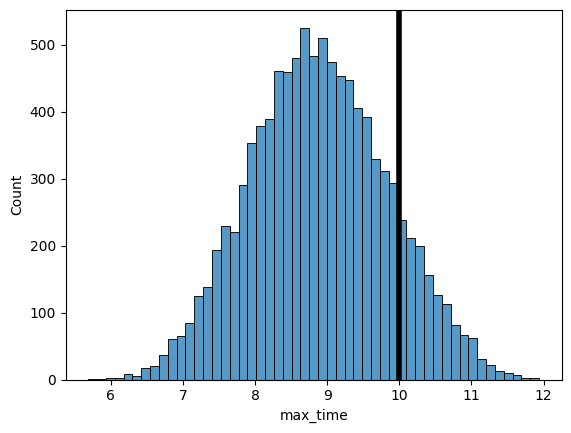

In [ ]:
sns.histplot(complete_table["max_time"])
plt.axvline(x=10, color="black", linewidth=4)
plt.show()

In [ ]:
complete_table["max_time"][complete_table["max_time"] < 10].count() / 10000

0.8705

In [ ]:
complete_table["cp"][complete_table["cp"] == 1].count() / 10000

0.8407

In [ ]:
cp_count = complete_table.value_counts("cp").sort_index()

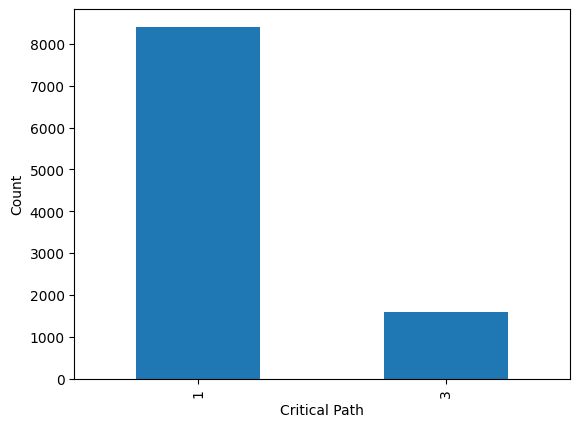

In [ ]:
cp_count.plot(kind='bar')
plt.xlabel('Critical Path')
plt.ylabel('Count')
plt.show()

What if A3 has a completion time of 2 instead of 1. Find the completion time and critical path with no variability.

What if A3 has variability (a = 1, m=2, b=3). Find the completion time and critical path with MC Simulations

What if A3 has even greater variability (a = 1, m=2, b=5). Find the completion time and critical path with MC Simulations